In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [3]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
73,2015,27
272,2015,27
303,2015,27
339,2015,27
430,2015,27
529,2015,27
756,2015,27
874,2015,27
1182,2015,27
1279,2015,27


In [4]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

73       201527
272      201527
303      201527
339      201527
430      201527
          ...  
19419    201735
19471    201735
19532    201735
19666    201735
19725    201735
Length: 20000, dtype: object


In [5]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
73,1.0
272,0.0
303,0.0
339,0.0
430,0.0
529,0.0
756,0.0
874,0.0
1182,0.0
1279,1.0


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df3=pd.concat([df1, df2], axis = 1).T.drop_duplicates().T
df3
df3.columns = ['FullDate', 'IsCanceled']

In [8]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
272,201527,0
303,201527,0
339,201527,0
430,201527,0
529,201527,0
756,201527,0
874,201527,0
1182,201527,0
2605,201527,0
2741,201527,0


In [9]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [10]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     40.0
201528     45.0
201529     79.0
201530     69.0
201531     95.0
          ...  
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, Length: 115, dtype: float64

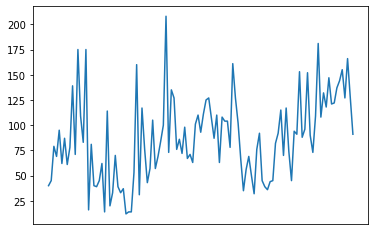

In [11]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [12]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,40.0
201528,45.0
201529,79.0
201530,69.0
201531,95.0
201532,62.0
201533,87.0
201534,61.0
201535,78.0


In [13]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, test = tseriesr[1:104], tseriesr[104:115]

In [14]:
train

FullDate
201528     45.0
201529     79.0
201530     69.0
201531     95.0
201532     62.0
          ...  
201720     73.0
201721    109.0
201722    181.0
201723    108.0
201724    132.0
Name: IsCanceled, Length: 103, dtype: float64

In [15]:
test

FullDate
201725    118.0
201726    147.0
201727    121.0
201728    122.0
201729    137.0
201730    144.0
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, dtype: float64

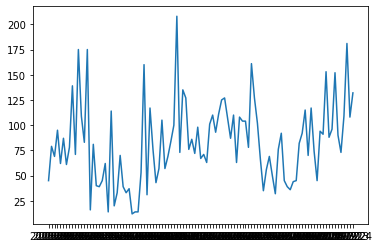

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

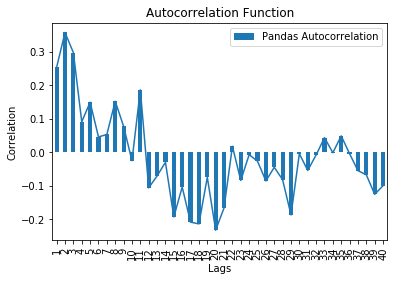

In [17]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [18]:
acf_1

array([ 0.25350072,  0.35725732,  0.29709152,  0.09044649,  0.14904301,
        0.04520499,  0.05280516,  0.15183131,  0.07696847, -0.02581255,
        0.18579452, -0.10675294, -0.07111   , -0.03042697, -0.19370498,
       -0.10450113, -0.20922507, -0.21451964, -0.07517614, -0.23321162,
       -0.16675068,  0.01733653, -0.08473103, -0.00764156, -0.0272529 ,
       -0.08610873, -0.04531365, -0.08254859, -0.18772752, -0.00486538,
       -0.05468567, -0.00860511,  0.04306632, -0.00185255,  0.04841136,
       -0.00492406, -0.05540132, -0.0678685 , -0.12615043, -0.10034535])

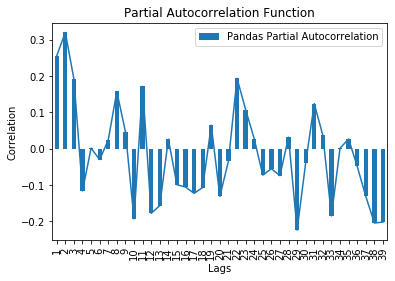

In [19]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [20]:
pacf_1

array([ 0.25598602,  0.31975613,  0.19156494, -0.11609668,  0.00159314,
       -0.02978753,  0.02404654,  0.15755837,  0.04676212, -0.19301148,
        0.17150826, -0.17767591, -0.15655084,  0.02631373, -0.09900853,
       -0.10545259, -0.12266062, -0.10669085,  0.06467711, -0.1311767 ,
       -0.03427407,  0.19394377,  0.10780181,  0.0277797 , -0.07259428,
       -0.05508374, -0.07407637,  0.03165855, -0.22406213, -0.03840341,
        0.12407706,  0.036462  , -0.18484459,  0.00139761,  0.0268101 ,
       -0.04855445, -0.13091737, -0.20436234, -0.20183339])

In [21]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.998923
p-value: 0.034995
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.582


In [22]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=574.094, BIC=577.918, Fit time=0.591 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit A

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=559.620, BIC=565.356, Fit time=1.565 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=543.988, BIC=551.637, Fit time=4.745 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=547.819, BIC=559.291, Fit time=8.493 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=542.114, BIC=547.850, Fit time=2.344 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=543.993, BIC=551.641, Fit time=3.361 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 52); AIC=546.114, BIC=555.674, Fit time=2.359 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 23.595 seconds


/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [23]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 52)   Log Likelihood                -268.057
Date:                            Thu, 22 Aug 2019   AIC                            542.114
Time:                                    23:36:20   BIC                            547.850
Sample:                                         0   HQIC                           544.298
                                            - 103                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0931      0.617     -0.151      0.880      -1.303       1.117
ma.L1         -0.9988      5.242     -0.191      0.849     -11.272       9.275
sigma2      2457.5277   1.29e+04      0.190      0.849   -2.29e+04    2.78e+04
===================================================================================
Ljung-Box (Q):                       51.87   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.10   Prob(JB):                         0.71
Heteroskedasticity (H):               1.06   Skew:                            -0.27
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=11), index=test.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [25]:
prediction

,Predicted_Cancellations
FullDate,
201725,79.502448
201726,83.409299
201727,75.316151
201728,113.223003
201729,122.129854
201730,105.036706
201731,122.943558
201732,136.850409
201733,138.757261


In [26]:
test

FullDate
201725    118.0
201726    147.0
201727    121.0
201728    122.0
201729    137.0
201730    144.0
201731    155.0
201732    127.0
201733    166.0
201734    128.0
201735     91.0
Name: IsCanceled, dtype: float64

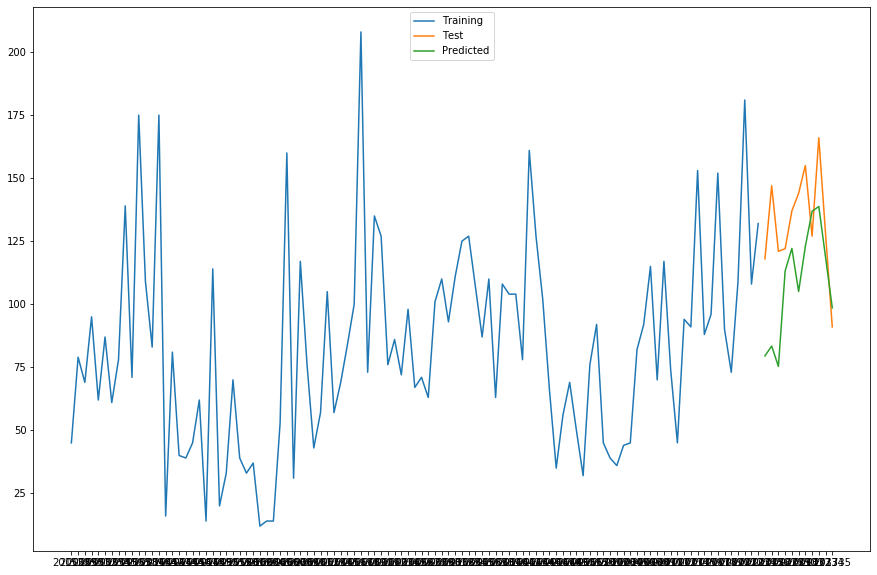

In [27]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [28]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [34]:
type(predictions)

pandas.core.series.Series

In [29]:
mda(test, predictions)

0.8181818181818182

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

m1 = np.mean(tseriesr[1:20]) # mean of distribution (July to November)
s1 = np.std(tseriesr[1:20]) # standard deviation of distribution
m2 = np.mean(tseriesr[21:40]) # mean of distribution (November to March)
s2 = np.std(tseriesr[21:40]) # standard deviation of distribution

x0 = m1 + s1 * np.random.randn(1000)
x1 = m2 + s2 * np.random.randn(1000)

period1 = go.Histogram(
    x=x0,
    opacity=0.75
)
period2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [period1, period2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

/home/michaeljgrogan/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/home/michaeljgrogan/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [31]:
tseriesr[1:20]

FullDate
201528     45.0
201529     79.0
201530     69.0
201531     95.0
201532     62.0
201533     87.0
201534     61.0
201535     78.0
201536    139.0
201537     71.0
201538    175.0
201539    109.0
201540     83.0
201541    175.0
201542     16.0
201543     81.0
201544     40.0
201545     39.0
201546     45.0
Name: IsCanceled, dtype: float64

In [32]:
tseriesr[21:40]

FullDate
201548     14.0
201549    114.0
201550     20.0
201551     33.0
201552     70.0
201553     39.0
201601     33.0
201602     37.0
201603     12.0
201604     14.0
201605     14.0
201606     53.0
201607    160.0
201608     31.0
201609    117.0
201610     76.0
201611     43.0
201612     57.0
201613    105.0
Name: IsCanceled, dtype: float64